In [1]:
import pandas as pd
import math
import time
from fs_functions import *
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [4]:
with open('results/seeds/FS3_results_seeds_cols.json', 'r') as json_file:
    seeds_dict = json.load(json_file)
seeds = pd.read_csv("data/seeds/seeds.csv", index_col=0)
seeds_target_class = 'class'

In [5]:
tds_values_list = [item['tds'] for item in seeds_dict.values()]
tds_values_list = sorted(list(set(tds_values_list)))

In [7]:
tds_score = tds_values_list[0]

for key, value in seeds_dict.items():
    if value.get('tds') == tds_score:
        ordering = value.get('columns_order')
        break

In [8]:
ordering

['asymmetry_coeff',
 'perimeter',
 'area',
 'width_kernel',
 'compactness',
 'length_kernel',
 'length_groove']

In [11]:
df = seeds
target = 'class'

In [14]:
df[target].unique()[0]

1

In [15]:
df_subset = df[df[target] == 1]

In [16]:
df_subset

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
65,12.88,13.50,0.8879,5.139,3.119,2.352,4.607,1
66,14.34,14.37,0.8726,5.630,3.190,1.313,5.150,1
67,14.01,14.29,0.8625,5.609,3.158,2.217,5.132,1
68,14.37,14.39,0.8726,5.569,3.153,1.464,5.300,1


In [17]:
ordering

['asymmetry_coeff',
 'perimeter',
 'area',
 'width_kernel',
 'compactness',
 'length_kernel',
 'length_groove']

In [19]:
ordering.append('class')

In [20]:
df_subset[ordering]

,asymmetry_coeff,perimeter,area,width_kernel,compactness,length_kernel,length_groove,class
0,2.221,14.84,15.26,3.312,0.8710,5.763,5.220,1
1,1.018,14.57,14.88,3.333,0.8811,5.554,4.956,1
2,2.699,14.09,14.29,3.337,0.9050,5.291,4.825,1
3,2.259,13.94,13.84,3.379,0.8955,5.324,4.805,1
4,1.355,14.99,16.14,3.562,0.9034,5.658,5.175,1
...,...,...,...,...,...,...,...,...
65,2.352,13.50,12.88,3.119,0.8879,5.139,4.607,1
66,1.313,14.37,14.34,3.190,0.8726,5.630,5.150,1
67,2.217,14.29,14.01,3.158,0.8625,5.609,5.132,1
68,1.464,14.39,14.37,3.153,0.8726,5.569,5.300,1


In [21]:
from pandas.plotting import parallel_coordinates

<Axes: >

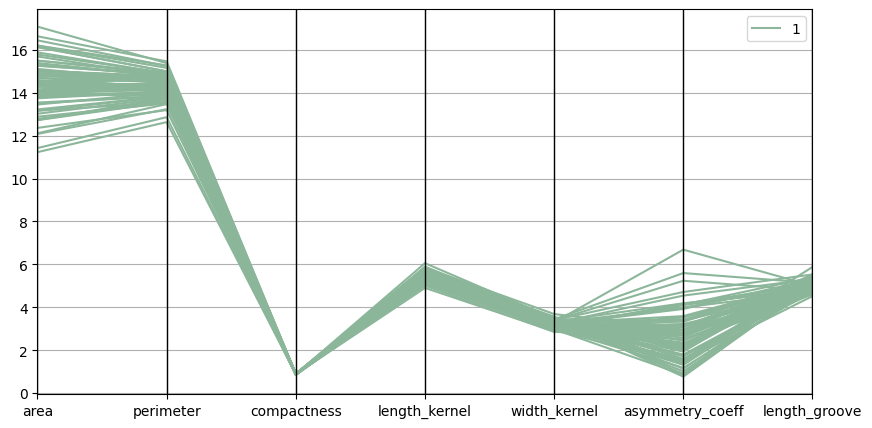

In [22]:
fig = plt.figure(figsize=(10, 5))
parallel_coordinates(df_subset, class_column=target)

In [ ]:
df_subset = df_subset[ordering]


In [ ]:
df_subset = df[df[target] == _class]
df_subset = df_subset[ordering]

In [2]:
datasets = []

cars = pd.read_csv('data/cars/cars.csv', index_col=0)
cars_year = pd.read_csv('data/cars_year/cars_year.csv', index_col=0)
ecoli = pd.read_csv('data/ecoli/ecoli.csv', index_col=0)
glass = pd.read_csv('data/glass/glass.csv', index_col=0)
iris = pd.read_csv('data/iris/iris.csv', index_col=0)
seeds = pd.read_csv('data/seeds/seeds.csv', index_col=0)
wine = pd.read_csv('data/wine/wine.csv', index_col=0)

iris['class'] = label_encoder.fit_transform(iris['class'])
ecoli['class'] = label_encoder.fit_transform(ecoli['class'])

datasets = [cars, cars_year, ecoli, glass, iris, seeds, wine]
datasets_name = ['cars', 'cars_year', 'ecoli', 'glass', 'iris', 'seeds', 'wine']
target_classes = ['origin', 'model year', 'class', 'Type of glass', 'class', 'class', 'class']

In [3]:
calculations = 0

for i in range(len(datasets)):
    df = datasets[i]
    target_class = target_classes[i]
    
    how_many = (math.factorial(df.shape[1] - 1) * df[target_class].nunique()) 
    how_many_formatted = '{:,}'.format(how_many)
    print(f'Dataset: {datasets_name[i]}, Columns: {df.shape[1] - 1}, Classes: {df[target_class].nunique()}, Calculations: {how_many_formatted}')
    
    calculations += how_many
    
print('Total calculations: ', '{:,}'.format(calculations))

Dataset: cars, Columns: 7, Classes: 3, Calculations: 15,120
Dataset: cars_year, Columns: 7, Classes: 13, Calculations: 65,520
Dataset: ecoli, Columns: 8, Classes: 8, Calculations: 322,560
Dataset: glass, Columns: 9, Classes: 6, Calculations: 2,177,280
Dataset: iris, Columns: 4, Classes: 3, Calculations: 72
Dataset: seeds, Columns: 7, Classes: 3, Calculations: 15,120
Dataset: wine, Columns: 13, Classes: 3, Calculations: 18,681,062,400
Total calculations:  18,683,658,072


### After kicking out the wine dataset

In [ ]:
datasets = [cars, cars_year, ecoli, glass, iris, seeds]
datasets_name = ['cars', 'cars_year', 'ecoli', 'glass', 'iris', 'seeds']
target_classes = ['origin', 'model year', 'class', 'Type of glass', 'class', 'class']
fs_used = ['FS1', 'FS1', 'FS2', 'FS2', 'FS3', 'FS3']

In [ ]:
calculations = 0

for i in range(len(datasets)):
    df = datasets[i]
    target_class = target_classes[i]
    
    how_many = (math.factorial(df.shape[1] - 1) * df[target_class].nunique()) 
    how_many_formatted = '{:,}'.format(how_many)
    print(f'Dataset: {datasets_name[i]}, Columns: {df.shape[1] - 1}, Classes: {df[target_class].nunique()}, Calculations: {how_many_formatted}')
    
    calculations += how_many
    
print('Total calculations: ', '{:,}'.format(calculations))

In [ ]:
results = []

for i in range(len(datasets)):
    df = datasets[i]
    target_class = target_classes[i]
    
    how_many = (math.factorial(df.shape[1] - 1) * df[target_class].nunique()) 
    how_many_formatted = '{:,}'.format(how_many)
    
    print(f'Dataset: {datasets_name[i]}, Columns: {df.shape[1] - 1}, Classes: {df[target_class].nunique()}, Calculations: {how_many_formatted}')
    
    file_path = f'results/{datasets_name[i]}/{fs_used[i]}_results_{datasets_name[i]}_cols.json'
    
    print(target_class)
    
    start_time = time.time()
    if fs_used[i] == 'FS1':
        result = run_permutations(df,target_class,file_path,FS1)
    elif fs_used[i] == 'FS2':
        result = run_permutations(df,target_class,file_path,FS2)
    else:
        result = run_permutations(df,target_class,file_path,FS3)
        
    results.append(result)
    
    end_time = time.time()
    elapsed_time = end_time - start_time 
    print("Elapsed time for FS2: {:.6f} seconds".format(elapsed_time))

In [4]:
datasets = [iris, seeds]
datasets_name = ['iris', 'seeds']
target_classes = ['class', 'class']
fs_used = ['FS3', 'FS3']

In [5]:
results = []

In [6]:
for i in range(len(datasets)):
    df = datasets[i]
    target_class = target_classes[i]
    
    how_many = (math.factorial(df.shape[1] - 1) * df[target_class].nunique()) 
    how_many_formatted = '{:,}'.format(how_many)
    
    print(f'Dataset: {datasets_name[i]}, Columns: {df.shape[1] - 1}, Classes: {df[target_class].nunique()}, Calculations: {how_many_formatted}')
    
    file_path = f'results/{datasets_name[i]}/{fs_used[i]}_results_{datasets_name[i]}_cols.json'
    
    print(target_class)
    
    start_time = time.time()
    if fs_used[i] == 'FS1':
        result = run_permutations(df,target_class,file_path,FS1)
    elif fs_used[i] == 'FS2':
        result = run_permutations(df,target_class,file_path,FS2)
    else:
        result = run_permutations(df,target_class,file_path,FS3)
        
    results.append(result)
    
    end_time = time.time()
    elapsed_time = end_time - start_time 
    print("Elapsed time for FS2: {:.6f} seconds".format(elapsed_time))

Dataset: iris, Columns: 4, Classes: 3, Calculations: 72
class
Elapsed time for FS2: 0.204716 seconds
Dataset: seeds, Columns: 7, Classes: 3, Calculations: 15,120
class
Elapsed time for FS2: 38.318788 seconds


In [ ]:
result